<a href="https://colab.research.google.com/github/bansalpriyam/first-contributions/blob/main/Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv('insurance.csv')

In [38]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [40]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
# Binary: sex, smoker,
# endure: region

In [43]:
df['sex']= df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker']= df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

df=df.join(pd.get_dummies(df['region'],prefix='region_')).drop('region', axis=1)

In [44]:
df

,age,sex,bmi,children,smoker,charges,region__northeast,region__northwest,region__southeast,region__southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,False,True


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   int64  
 1   sex                1338 non-null   int64  
 2   bmi                1338 non-null   float64
 3   children           1338 non-null   int64  
 4   smoker             1338 non-null   int64  
 5   charges            1338 non-null   float64
 6   region__northeast  1338 non-null   bool   
 7   region__northwest  1338 non-null   bool   
 8   region__southeast  1338 non-null   bool   
 9   region__southwest  1338 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 68.1 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

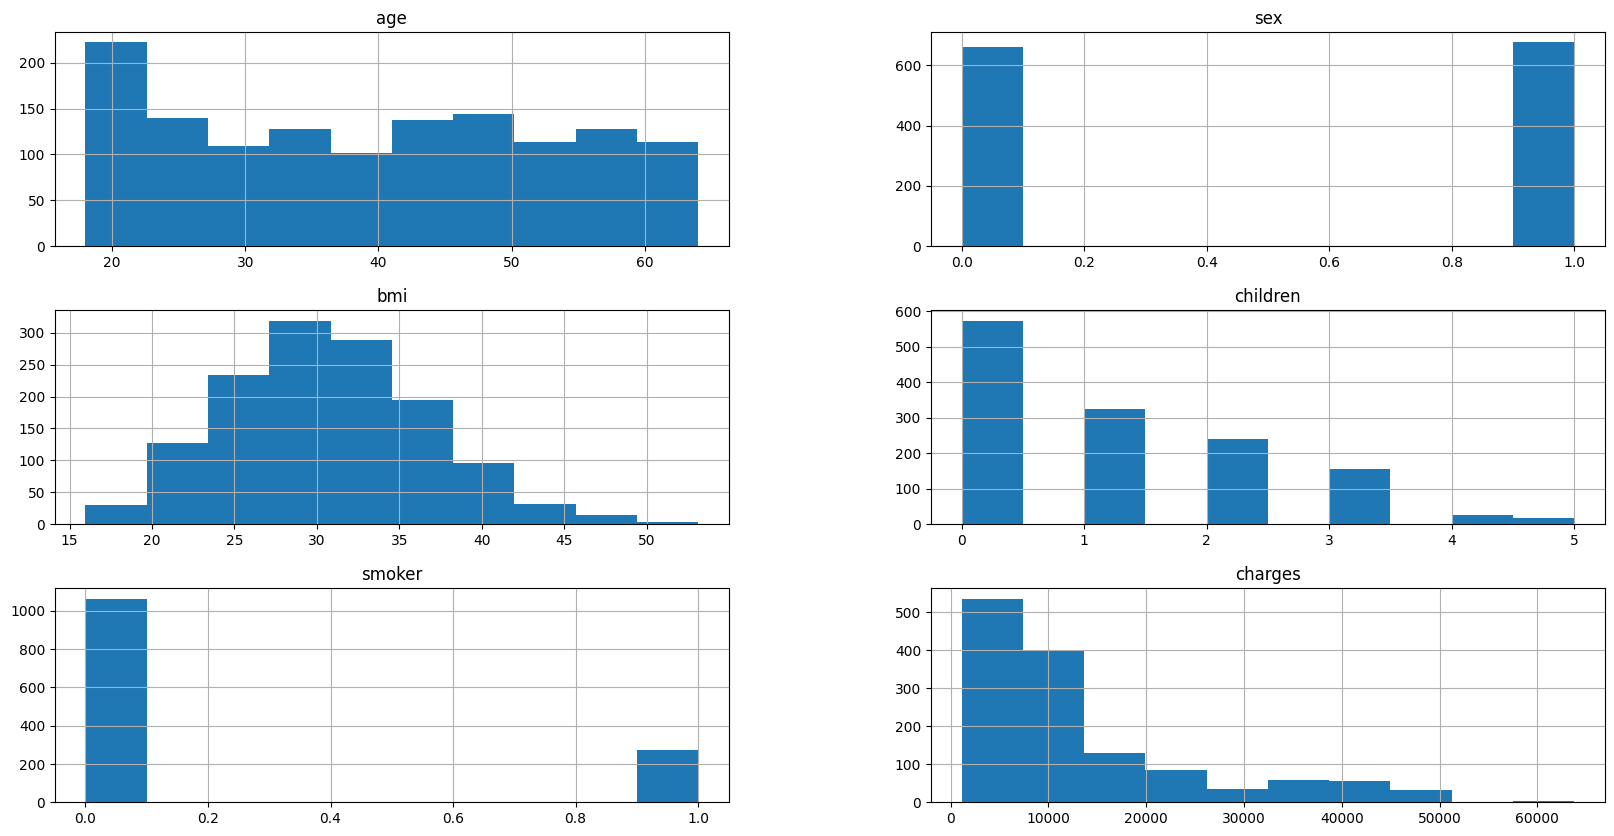

In [46]:
df.hist(figsize=(20,10))

<Axes: >

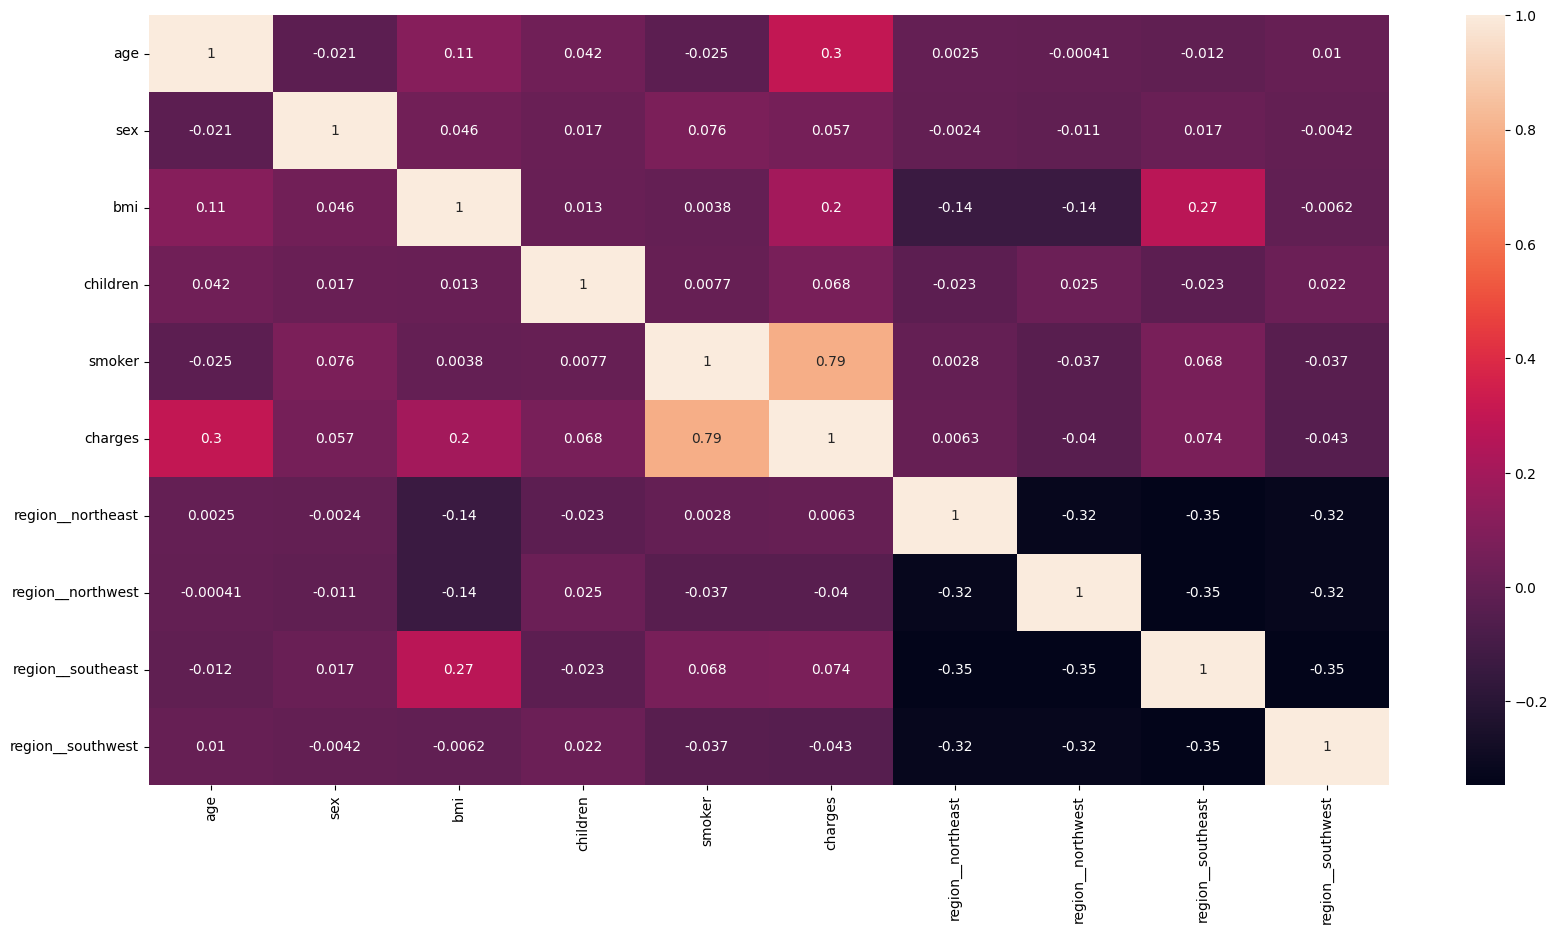

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [49]:
X,y=df.drop('charges', axis=1), df['charges']
X_train, X_test, y_train , y_test=train_test_split(X,y, test_size=0.4, random_state=5)

model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [50]:
model.score(X_test, y_test)

0.8384778162633592

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
mae=mean_absolute_error(y_test, y_pred)

In [53]:
rmse

4685.5039470337015

In [54]:
mae

2672.947217135075

In [56]:
df.charges.std()

12110.011236693994

In [57]:
y_test.std()

11669.324668946665

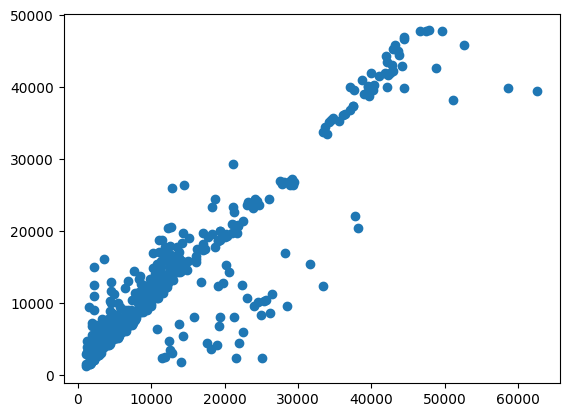

In [58]:
plt.scatter(y_test, y_pred)

In [60]:
feature_importances=sorted(zip(model.feature_names_in_,model.feature_importances_, X.columns), key=lambda x:x[1], reverse=True)

<BarContainer object of 9 artists>

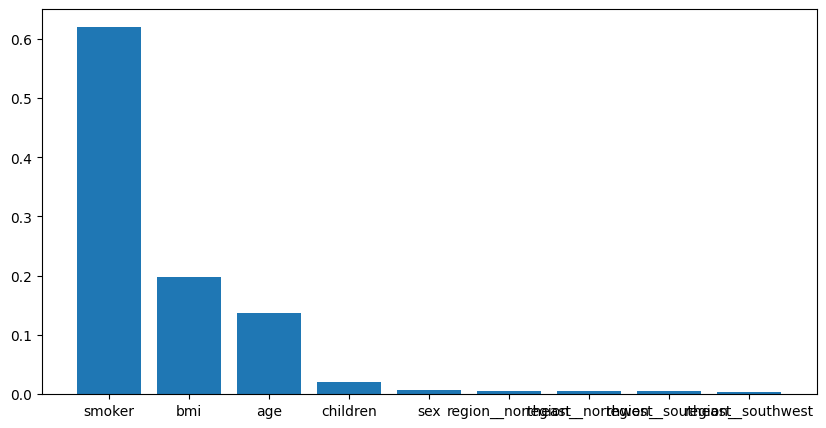

In [64]:
plt.figure(figsize=(10,5))
plt.bar([x[0] for x in feature_importances] , [x[1] for x in feature_importances])



In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None,2,5,10,15],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4,6,8,10]
}

model=RandomForestRegressor()
grid_search=GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8]})

In [74]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 6}

In [75]:
model=grid_search.best_estimator_

In [76]:
model

RandomForestRegressor(max_depth=15, min_samples_leaf=10, min_samples_split=6)

In [77]:
model.score(X_test, y_test)

0.8640273968479842

In [78]:
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
mae=mean_absolute_error(y_test, y_pred)
rmse
mae

2468.079648881852

In [79]:
rmse

4298.984955942756